<a href="https://colab.research.google.com/github/Antonio-Richaud/Challenge-Robot-Trading/blob/main/Challenge_Robot_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Primer Challenge - Robot Trading (simple) 🤖**
##*Por Antonio Richaud*


### **1. Configuración del ambiente**

Listo el Google Colab para empezar a trabajar 🤠

Se añaden las librerias que vamos a utilizar para el proyecto 👾

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
# from datetime import date, timedelta

### **2. Obtención de los datos**

Creamos una funcion llamada "importar_base_bitcoin()", dentro de ella, definiremos nuevamente las variables globales(ver Paso1)

Utilizando la biblioteca yfinance de Python para extraer el histórico de precios del Bitcoin en dólares BTC-USD, deberás extraer el histórico de los últimos 7 días en intervalos de 5 minutos, este histórico deberás guardarlo en el dataframe df_bitcoin.

Y hacemos un head porque más vale ir corroborando nuestros datos 🧐

In [5]:
def importar_base_bitcoin():
  global df_bitcoin

  #Obtenemos datos historicos del Bitcoin
  df_bitcoin = yf.download('BTC-USD', period= '7d', interval='5m')

In [8]:
importar_base_bitcoin()
df_bitcoin.head() # 👀

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-03-28 00:00:00+00:00,69438.671875,69438.671875,69364.460938,69403.390625,69403.390625,0
2024-03-28 00:05:00+00:00,69444.742188,69501.312500,69444.742188,69501.312500,69501.312500,32464896
2024-03-28 00:10:00+00:00,69500.414062,69524.296875,69496.210938,69496.210938,69496.210938,21266432
2024-03-28 00:15:00+00:00,69498.382812,69581.406250,69480.718750,69581.406250,69581.406250,0
2024-03-28 00:20:00+00:00,69837.625000,69887.851562,69818.648438,69858.023438,69858.023438,211779584


Creamos una funcion llamada "extraer_tendencias()", dentro de ella, definimos nuevamente las variables globales(ver Paso1)

Utilizando la biblioteca BeautifulSoup realizaremos Web Scraping de la página https://coinmarketcap.com/ para extraer el precio actual del Bitcoin BTC en dólares USD y la variación de su precio en la última hora 1h % . El precio deberás convertirlo a float y guardarlo en la variable llamada "precio_actual".  Ahora, en la variable tendencia guardaremos el valor de 'baja'si la variación del precio es negativa, sino, guardaremos el valor de 'alta'.

In [9]:
def extraer_tendencias():

  global precio_actual, tendencia
  url = 'https://coinmarketcap.com/'
  respuesta = requests.get(url)

  #Confirmación de que la busqueda se realizo correctamente
  if respuesta.status_code == 200:
    s = BeautifulSoup(respuesta.content, 'lxml')

    #Obtenemos los span de la primera fila de la tabla en coinmarketcap.com
    html_row = s.findAll("tr")
    html_row = html_row[1]
    elementos = html_row.findAll("span")

    #Obtenemos el precio actual del Bitcoin en dolares (USD)
    precio_actual = float(elementos[2].text.replace('$', '').replace(',',''))

    #Obtenemos la tendencia (Alta o Baja)
    if elementos[3].next.attrs['class'][0] == "icon-Caret-up":
      tendencia = 'Alta 📈'

    else:
      tendencia = 'Baja 📉'

  else:
    print("Error al cargar la página de CoinMarketCap")

A ver 👀

In [10]:
extraer_tendencias()
print(f'Precio Actual: ${precio_actual} USD')
print(f'Tendencia: {tendencia}')

Precio Actual: $66373.29 USD
Tendencia: Baja 📉


### **3. Limpieza de los datos**


Antes de limpiar la base, crearemos una copia de la base df_bitcoin para que realicemos la limpieza en esta nueva base de datos(df_bitcoin_limpio), sin modificar la base de datos original, además es importante entender su contenido:

**Datetime:** Es el índice del dataframe, y contiene la fecha y hora del intervalo seleccionado, no puede estar duplicado.

**Open:** Contiene el precio del Bitcoin al inicio del intervalo.

**High:** Contiene el precio más alto del Bitcoin durante el intervalo.

**Low:** Contiene el precio más bajo del Bitcoin durante el intervalo.

**Close:** Contiene el precio del Bitcoin al final del intervalo.

**Volume:** Contiene el total de transacciones hechas durante el intervalo.

In [11]:
# Creamos copia del dataframe Bitcoin
global df_bitcoin_limpio
df_bitcoin.drop('Adj Close', axis =1, inplace=True)
df_bitcoin_limpio = df_bitcoin.copy()

In [17]:
def analisis():

  global df_bitcoin_limpio

  # Identificación de índices repetidos
  indices_repetidos = df_bitcoin_limpio.duplicated().sum()
  # Chequeo de valores nulos en la columna "Close
  valores_nulos_close = 'Si' if df_bitcoin_limpio.Close.isna().any() == True else "No"
  # Conteo de registros con Volume menor o igual a cero
  registros_cero = df_bitcoin_limpio.Volume[df_bitcoin_limpio.Volume <= 0].count()

  print(f'Existen {indices_repetidos} indices repetidos.')
  print(f'Existen valores nulos en la columna "Close": {valores_nulos_close}')
  print(f'Registros que tengan registros Volume de transacción menor o igual a cero: {registros_cero}')

analisis()

Existen 0 indices repetidos.
Existen valores nulos en la columna "Close": No
Registros que tengan registros Volume de transacción menor o igual a cero: 957


A ver 👀

In [18]:
df_bitcoin_limpio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1911 entries, 2024-03-28 00:00:00+00:00 to 2024-04-03 15:10:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1911 non-null   float64
 1   High    1911 non-null   float64
 2   Low     1911 non-null   float64
 3   Close   1911 non-null   float64
 4   Volume  1911 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 89.6 KB


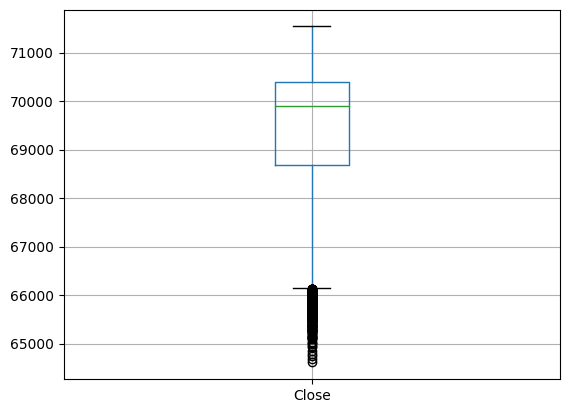

In [19]:
df_bitcoin_limpio.boxplot('Close');

Creamos una funcion llamada "limpieza_datos()", dentro de ella, definiremos nuevamente las variables globales(ver Paso1)

Para la limpieza utilizaremos los atributos Datetime, Close y Volume.

Analizaremos la base df_bitcoin_limpio, identificaremso duplicados en el índice y los trataremos para quedarnos con sólo índices únicos.

Luego buscaremos por valores nulos en la columna Close y los trátaremso.

Verificaremos que todos los registros de la base tengan un Volume de transacción mayor a 0, caso contrário, cuello.

Deberemos identificar y eliminar los outliers en el precio del Bitcoin, columna Close, utilizaremos un gráfico de boxplot para identificarlos.

Filtraremos o selecciona únicamente los registros cuyo precio(Close) se encuentren entre el 1er cuartil(Q1) y el 3er cuartil(Q3) del boxplot.

Finalmente, calculamos el precio promedio(Close) de esta selección y la guardamos en la variable media_bitcoin.

In [20]:
def limpieza_datos():

  global df_bitcoin, media_bitcoin, df_bitcoin_limpio

  #Creamos una copia del dataframe original
  df_bitcoin_limpio = df_bitcoin.copy()
  # Eliminamos valores respetidos del dataframe en caso de existir
  df_bitcoin_limpio.drop_duplicates(inplace=True)

  # Tratamos los valores nulos de la columna close
  valores_nulos = df_bitcoin_limpio.Close.isna().any()
  if valores_nulos == True:
    df_bitcoin_limpio.Close.fillna(method='ffill', inplace=True)

  # Eliminamos registros que tengan un Volume de transaccion igual cero
  query = df_bitcoin_limpio.query('Volume <= 0').index
  df_bitcoin_limpio.drop(query, axis = 0, inplace = True)

  # Seleccionamos registro de la columna Close que esten entre Q1 y Q3
  Q1 = df_bitcoin_limpio.Close.quantile(0.25)
  Q3 = df_bitcoin_limpio.Close.quantile(0.75)

  # IIQ = Q3-Q1
  df_bitcoin_limpio = df_bitcoin_limpio.query(f'Close > {Q1} & Close < {Q3}')

  # Calculamos la media con los datos ya filtrados.
  media_bitcoin = df_bitcoin_limpio.Close.mean()

  df_bitcoin

In [21]:
limpieza_datos()
analisis()

print(f'\nEl promedio del precio de Bitcoin es: {round(media_bitcoin,2)}')

Existen 0 indices repetidos.
Existen valores nulos en la columna "Close": No
Registros que tengan registros Volume de transacción menor o igual a cero: 0

El promedio del precio de Bitcoin es: 69511.12


A ver 👀

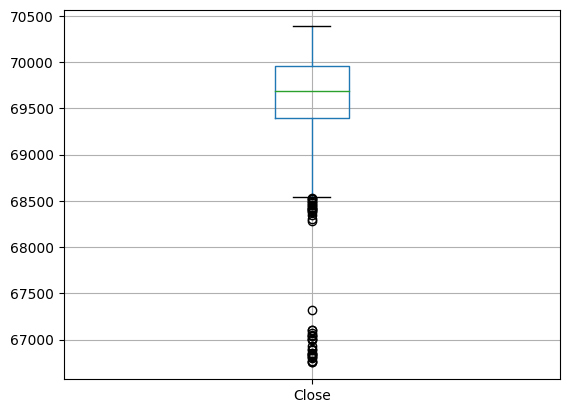

In [22]:
df_bitcoin_limpio.boxplot('Close');

### **4. Tomar decisiones**

Creamos una función llamada "tomar_decisiones()", dentro de ella, define nuevamente las variables globales(ver Paso1)

Rellenamos la variable algoritmo_decision con el valor resultante del siguiente criterio de decisión:

Si el precio actual es mayor/igual que el precio promedio y la tendencia es de baja, entonces guarda el valor ‘Vender’.

Si el precio actual es menor que el precio promedio y la tendencia es de alta, entonces guarda el valor ‘Comprar’.

Si ninguna de las 2 condiciones anteriores se cumple, entonces guarda el valor 'Esperar'.

In [23]:
def tomar_decision():

  global algoritmo_decision, tendencia, media_bitcoin, precio_actual

  if precio_actual >= media_bitcoin and tendencia == 'Baja':
    algoritmo_decision = 'Vender'

  elif precio_actual < media_bitcoin and tendencia == 'Alta':
    algoritmo_decision = 'Comprar'

  else:
    algoritmo_decision = 'Esperar'

In [24]:
tomar_decision()

### **5. Visualización**

Creamos una funcion llamada "visualizacion()", dentro de ella, definimos nuevamente las variables globales(ver Paso1)

- Adicionamos una nueva columna (Promedio) al dataframe original df_bitcoiny almacena el valor de nuestra variable media_bitcoin.

- Configura el tamaño del gráfico en una proporción de 16x5.

- Adiciona un título al gráfico.

- Usando el método plot()dibuja una línea en el gráfico, con los datos del índice y la columna Close de la base df_bitcoin.

- Usando el método plot()dibuja una línea en el gráfico, con los datos del índice y la columna Promedio de la base df_bitcoin.

- Usando el método annotate()muestra un mensaje dentro del gráfico con la decisión calculada del algoritmo.

- Finalmente, usando el método show()muestra en pantalla el gráfico que acabamos de configurar.

In [26]:
def visualizacion():

  global df_bitcoin, media_bitcoin, algoritmo_decision

  # Añadimos una nueva columna (Promedio)
  df_bitcoin['Promedio'] = media_bitcoin

  # Configuración del gráfico 📈

  #plt.style.use("dark_background")
  plt.figure(figsize=(16,5))
  plt.title('Precio del Bitcoin en los ultimos 7 días')
  plt.plot(df_bitcoin.index, df_bitcoin.Close, linewidth = 0.85, color = 'black');
  plt.plot(df_bitcoin.index, df_bitcoin.Promedio, color = 'orange');
  plt.legend(['Precio Bitcoin', 'Promedio (7d)'])

  color = 'green' if algoritmo_decision == 'Vender' else 'blue' if algoritmo_decision == 'Comprar' else 'red'
  plt.annotate(algoritmo_decision, xy=(df_bitcoin.index[-1], df_bitcoin.Close[-1]), xytext=(df_bitcoin.index[-1], df_bitcoin.Close[-1]-1500),
             arrowprops=dict(facecolor=color, shrink=.1, width = 3, headwidth = 8), horizontalalignment='center')
  plt.show()

A ver 👀

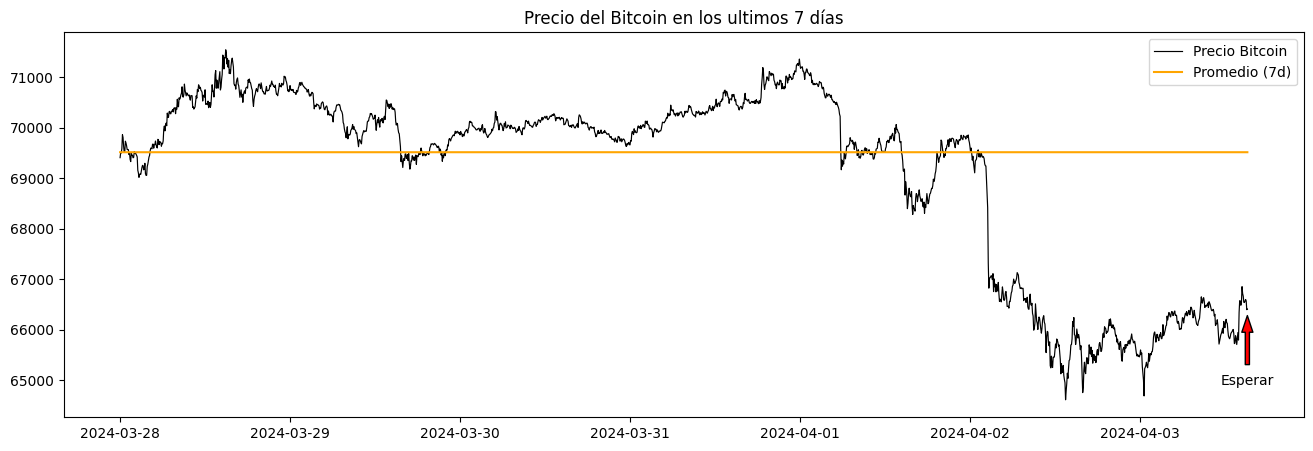

In [27]:
visualizacion()

### **6. Automatización**

El trabajo de un Data Scientist sólo termina cuando la solución al problema está automatizada, esto permite soluciones automáticas para nuevos lotes de información.

- Importa el método 'clear_output()', este método nos permite borrar los resultados de la pantalla antes de imprimir un nuevo gráfico, y así evitar tener más de un gráfico en la pantalla, impórtalo de la siguiente forma: from IPython.display import clear_output.

- Importa también la biblioteca ‘time’ de la siguiente forma: import time, utilizaremos su método time.sleep(300) para interrumpir la ejecución del código cada 300 segundos o 5 minutos.

- Finalmente construiremos un loop infinito para ejecutar permanentemente y en intervalos de 5minutos, las funciones que hemos construído en los pasos 2 al 5 de nuestro proyecto.

In [30]:
# Importamos librerias
from IPython.display import clear_output
import time

[*********************100%%**********************]  1 of 1 completed


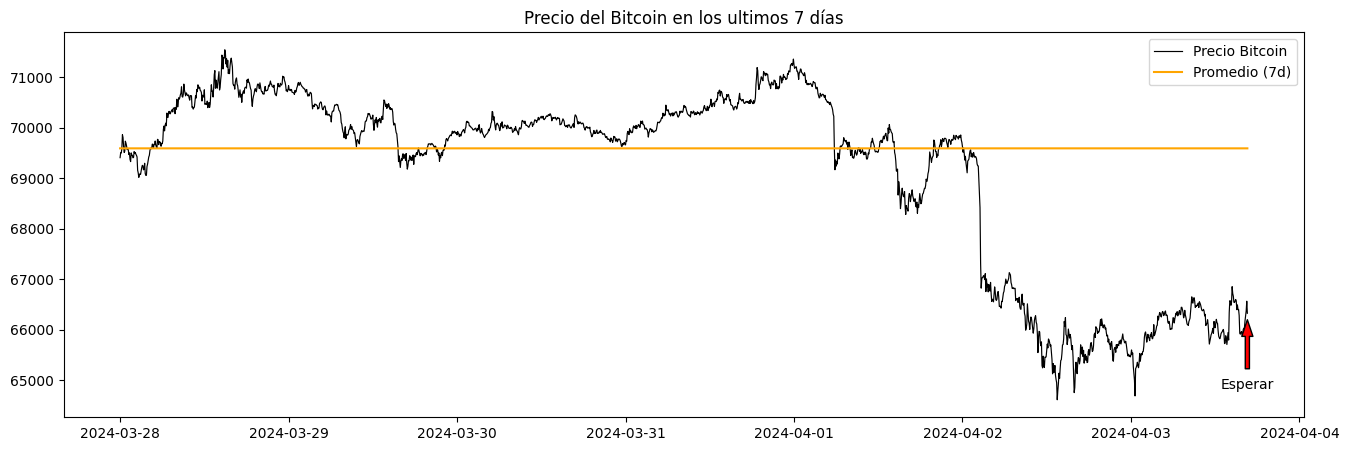

In [ ]:
# Bucle infinito

while(True):

  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  tomar_decision()
  visualizacion()
  time.sleep(300)